In [32]:
import pandas as pd
from matplotlib import pyplot as plt
vqc_loo_data = pd.read_csv('vqc_loo_scores.csv')
qsvc_loo_data = pd.read_csv('qsvc_loo_scores.csv')

In [44]:
vqc_loo_data.columns =  ['Description', 'Test','Difference','Percentage Difference']

In [55]:
vqc_loo_data = vqc_loo_data.drop(index = 0)

In [56]:
vqc_loo_data

Description      Test  Difference  Percentage Difference
1  Missing Sepal Length  0.866667    0.000000               0.000000
2   Missing Sepal Width  0.833333   -0.033333              -3.846154
3  Missing Petal Length  0.933333    0.066667               7.692308
4   Missing Petal Width  0.733333   -0.133333             -15.384615

In [57]:
vqc_loo_data.to_csv('vqc_loo_scores.csv')

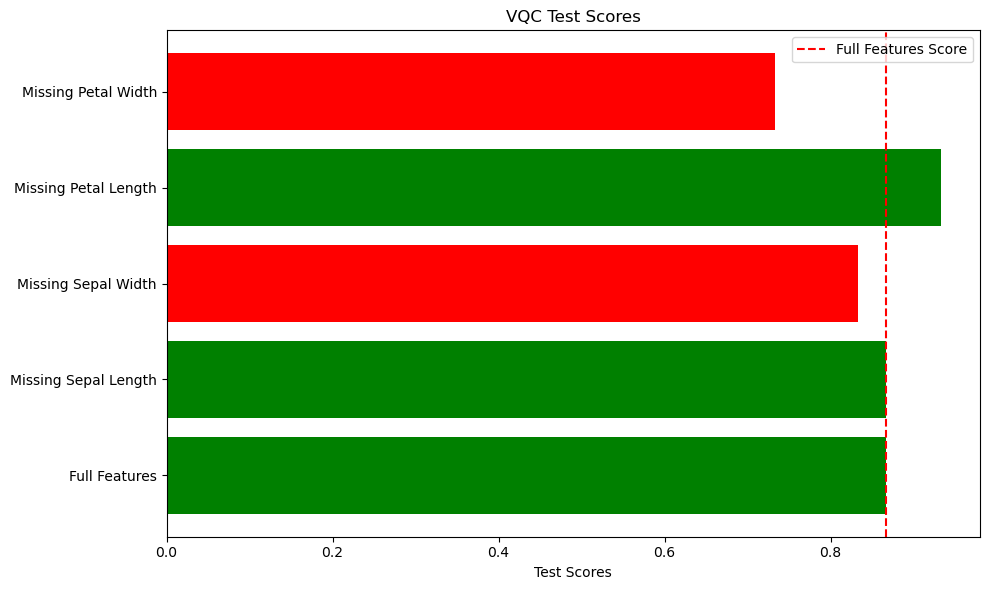

In [46]:
plt.figure(figsize=(10, 6))
categories = vqc_loo_data['Description']
test_scores = vqc_loo_data['Test']
full_feature_score = vqc_loo_data['Test'][0]
color_map = ['green' if score >= full_feature_score else 'red' for score in test_scores]

bars = plt.barh(categories, test_scores, color=color_map)
plt.axvline(x=full_feature_score, color='red', linestyle='--', label='Full Features Score')

plt.xlabel('Test Scores')
plt.title('VQC Test Scores')
plt.legend()
plt.tight_layout()

plt.savefig('Visuals/FI/LOO/VQC_LOO_test_scores.png')
plt.show()

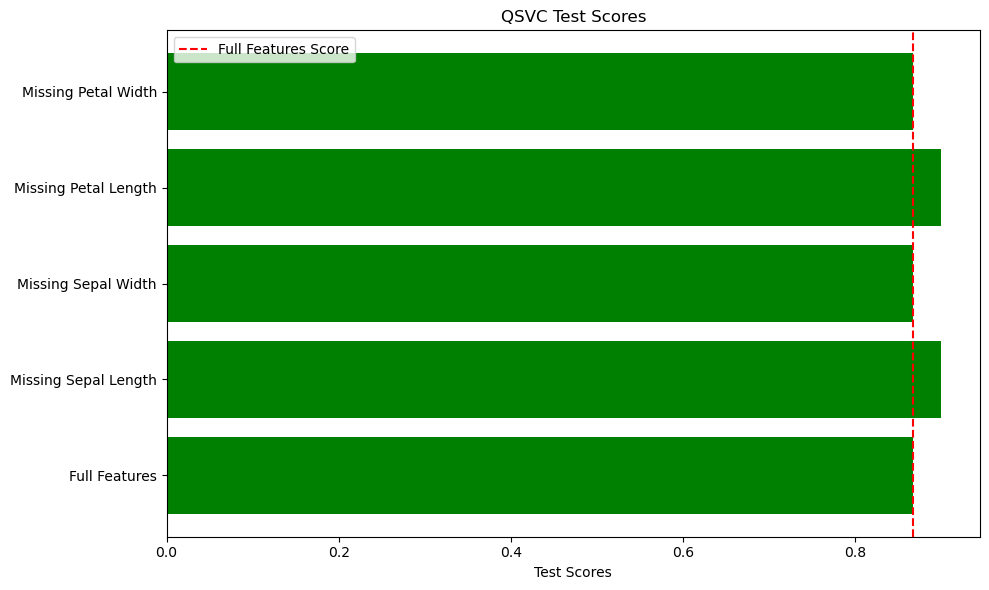

In [47]:
plt.figure(figsize=(10, 6))
categories = qsvc_loo_data['Description']
test_scores = qsvc_loo_data['Test Score']
full_feature_score = qsvc_loo_data['Test Score'][0] 

color_map = ['green' if score >= full_feature_score else 'red' for score in test_scores]
bars = plt.barh(categories, test_scores, color=color_map)
plt.axvline(x=full_feature_score, color='red', linestyle='--', label='Full Features Score')

plt.xlabel('Test Scores')
plt.title('QSVC Test Scores')  
plt.legend()

plt.tight_layout()
plt.savefig('Visuals/FI/LOO/QSVC_LOO_test_scores.png')  
plt.show()

In [52]:
full_feature_test_score = qsvc_loo_data[qsvc_loo_data['Description'] == 'Full Features']['Test Score'].values[0]

data = []
for index, row in qsvc_loo_data.iterrows():
    test_score = row['Test Score']
    description = row['Description']
    if description != "Full Features": 
        difference = test_score - full_feature_test_score
        difference_percentage = (difference / full_feature_test_score) * 100
        data.append({"Description": description, 
                     "Test": test_score, 
                     "Difference": difference,
                     "Percentage Difference": difference_percentage})

qsvc_scores_df = pd.DataFrame(data)

In [49]:
qsvc_scores_df.to_csv('qsvc_loo_cleaned.csv')

In [53]:
qsvc_scores_df

Description      Test  Difference  Percentage Difference
0  Missing Sepal Length  0.900000    0.033333               3.846154
1   Missing Sepal Width  0.866667    0.000000               0.000000
2  Missing Petal Length  0.900000    0.033333               3.846154
3   Missing Petal Width  0.866667    0.000000               0.000000